HAR70+(Human Activity Recognition 70+)Dataset

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('501.csv')

In [3]:
data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,2021-03-24 15:17:05.980,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,2021-03-24 15:17:06.000,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,2021-03-24 15:17:06.019,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,2021-03-24 15:17:06.039,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [4]:
data.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [7]:
data['label'].value_counts()

1    62872
7    14562
6    14376
8     9578
3     1876
5      504
4       92
Name: label, dtype: int64

Text(0.5, 1.0, 'label')

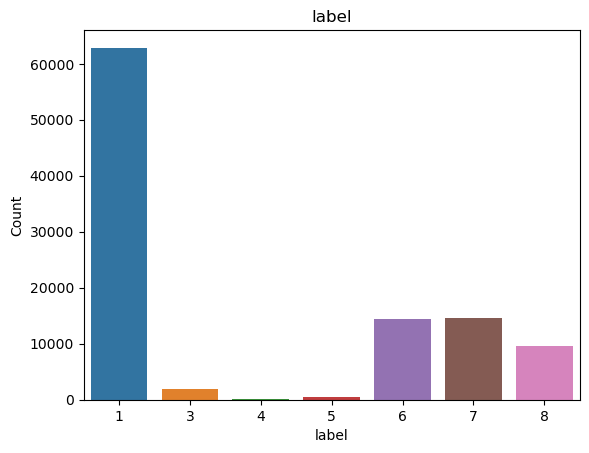

In [8]:
sns.countplot(data=data,x='label')
plt.xlabel('label')
plt.ylabel('Count')
plt.title('label')

In [9]:
data=data.sample(frac=0.05)

In [10]:
data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
49363,2021-03-24 14:58:53.220,-0.906250,-0.033447,-0.111816,-0.937256,-0.135742,0.063477,1
89853,2021-03-24 15:12:23.020,-0.689697,-0.031494,-0.205078,-0.959717,-0.232178,-0.253906,1
82563,2021-03-24 15:09:57.220,-0.827881,-0.249023,-0.155273,-0.465332,-0.009766,0.267090,1
41344,2021-03-24 14:56:12.840,-0.682617,-0.131836,0.043457,-0.264893,0.155762,-0.655273,1
16118,2021-03-24 14:47:29.399,-1.000000,-0.062500,0.015869,-0.953125,0.000000,0.078125,6
...,...,...,...,...,...,...,...,...
100524,2021-03-24 15:15:57.439,-0.781250,-0.062500,0.533691,-0.187500,-0.202637,-1.062500,7
55807,2021-03-24 15:01:02.099,-0.786865,-0.169434,-0.132812,-0.636475,-0.059082,0.242920,1
103843,2021-03-24 15:17:05.739,-1.044434,-0.046143,-0.151855,-1.030762,-0.071045,0.093506,6
92176,2021-03-24 15:13:09.479,-1.394531,-0.353271,-0.585693,-0.342529,0.012695,0.703125,1


In [11]:
X=data.iloc[:,1:7].values
y=data.iloc[:,7].values

In [12]:
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
Y=pd.get_dummies(y1).values

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
X

array([[-0.90625 , -0.033447, -0.111816, -0.937256, -0.135742,  0.063477],
       [-0.689697, -0.031494, -0.205078, -0.959717, -0.232178, -0.253906],
       [-0.827881, -0.249023, -0.155273, -0.465332, -0.009766,  0.26709 ],
       ...,
       [-1.044434, -0.046143, -0.151855, -1.030762, -0.071045,  0.093506],
       [-1.394531, -0.353271, -0.585693, -0.342529,  0.012695,  0.703125],
       [-0.80249 , -0.284912, -0.130859, -0.59668 , -0.242188,  0.383301]])

In [15]:
X.shape

(5193, 6)

In [16]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
Y.shape

(5193, 7)

In [18]:
model = Sequential()

model.add(Dense(60,input_shape=(6,),activation='ReLU'))
model.add(Dense(60,activation='ReLU'))
model.add(Dense(40,activation='ReLU'))
model.add(Dense(40,activation='ReLU'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                420       
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 40)                2440      
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 7)                 287       
                                                                 
Total params: 8,447
Trainable params: 8,447
Non-trainable params: 0
_________________________________________________________________


C:\Users\82109\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
130/130 [==============================] - 2s 8ms/step - loss: 0.4425 - accuracy: 0.8613 - val_loss: 0.2599 - val_accuracy: 0.9394
Epoch 2/100
130/130 [==============================] - 1s 4ms/step - loss: 0.4268 - accuracy: 0.9042 - val_loss: 0.2722 - val_accuracy: 0.9076
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: 0.2469 - accuracy: 0.9302 - val_loss: 0.2104 - val_accuracy: 0.9500
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 0.2343 - accuracy: 0.9413 - val_loss: 0.2931 - val_accuracy: 0.9278
Epoch 5/100
130/130 [==============================] - 1s 5ms/step - loss: 0.2121 - accuracy: 0.9410 - val_loss: 0.2084 - val_accuracy: 0.9480
Epoch 6/100
130/130 [==============================] - 1s 5ms/step - loss: 0.2193 - accuracy: 0.9381 - val_loss: 0.1697 - val_accuracy: 0.9567
Epoch 7/100
130/130 [==============================] - 1s 4ms/step - loss: 0.1841 - accuracy: 0.9494 - val_loss: 0.2207 - val_accuracy: 0.9442

Epoch 58/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.8481 - val_loss: 0.3641 - val_accuracy: 0.8460
Epoch 59/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3707 - accuracy: 0.8524 - val_loss: 0.3896 - val_accuracy: 0.8422
Epoch 60/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3645 - accuracy: 0.8582 - val_loss: 0.3695 - val_accuracy: 0.8450
Epoch 61/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3595 - accuracy: 0.8539 - val_loss: 0.3843 - val_accuracy: 0.8393
Epoch 62/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3637 - accuracy: 0.8536 - val_loss: 0.3830 - val_accuracy: 0.8422
Epoch 63/100
130/130 [==============================] - 1s 5ms/step - loss: 0.3662 - accuracy: 0.8532 - val_loss: 0.3665 - val_accuracy: 0.8383
Epoch 64/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3654 - accuracy: 0.8544 - val_loss: 0.3832 - val_accuracy:

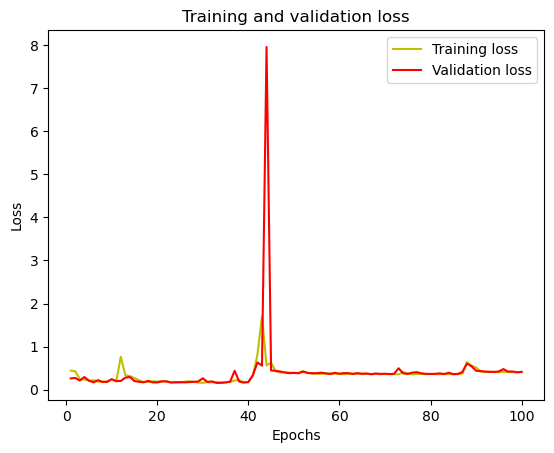

In [20]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

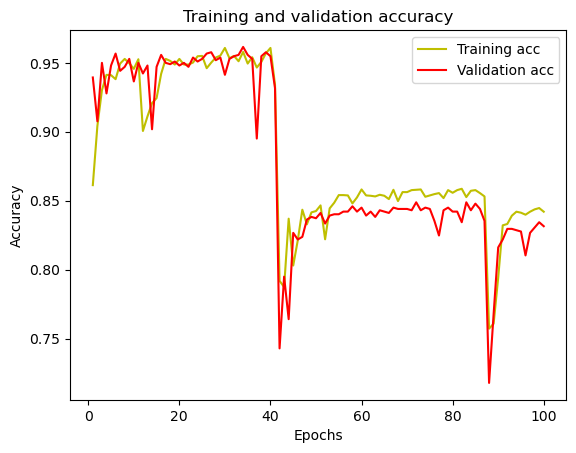

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       615
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.95      0.86      0.90       141
           5       0.54      1.00      0.70       149
           6       0.00      0.00      0.00       113

    accuracy                           0.83      1039
   macro avg       0.35      0.40      0.36      1039
weighted avg       0.76      0.83      0.79      1039

[[594   0   0   0   6  15   0]
 [ 16   0   0   0   1   0   0]
 [  1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 20   0   0   0 121   0   0]
 [  0   0   0   0   0 149   0]
 [  0   0   0   0   0 113   0]]


C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82109\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
